# Building Baseline

We are deciding to start with KNN model as it trains quickly, and easily outputs multiple options

In [16]:
import sys
sys.path.append("/user/antonis/code/Ant-mel/legendary_game_recs/")

import pandas as pd
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import MultiLabelBinarizer, PowerTransformer
from sklearn.compose import ColumnTransformer


In [4]:
final_data = pd.read_json('../raw_data/final_data')


In [5]:
final_data.columns


Index(['title', 'release_date', 'plays', 'playing', 'backlogs', 'wishlist',
       'developers', 'avg_review', 'genres', 'platforms', 'description',
       'total_reviews', 'total_lists', 'main', 'ratings_zero_five',
       'ratings_one_zero', 'ratings_one_five', 'ratings_two_zero',
       'ratings_two_five', 'ratings_three_zero', 'ratings_three_five',
       'ratings_four_zero', 'ratings_four_five', 'ratings_five_zero', 'url',
       'game_id'],
      dtype='object')

In [6]:
# Columns we don't need immediately
cols_to_drop = ['title', 'release_date', 'plays', 'playing', 'backlogs', 'wishlist',
       'developers', 'platforms', 'description',
       'total_reviews', 'main', 'ratings_zero_five',
       'ratings_one_zero', 'ratings_one_five', 'ratings_two_zero',
       'ratings_two_five', 'ratings_three_zero', 'ratings_three_five',
       'ratings_four_zero', 'ratings_four_five', 'ratings_five_zero', 'url',
       'game_id']


In [7]:
final_useful_columns = final_data.drop(columns=cols_to_drop)
final_useful_columns


,avg_review,genres,total_lists
0,0.0,"[Indie, Racing, Sport]",0
1,0.0,"[Adventure, Indie]",1
2,0.0,[RPG],5
3,0.0,[Adventure],0
4,0.0,[RPG],36
...,...,...,...
37910,3.2,"[Puzzle, Strategy]",10
37911,2.9,"[Puzzle, Tactical]",9
37912,3.5,[Point-and-Click],16
37913,4.0,[Visual Novel],0


In [8]:
# Initilizing encoder and transforming the data
mlb_genre = MultiLabelBinarizer()
transformed_genre = mlb_genre.fit_transform(final_useful_columns['genres'])

# Labeling newly created features
genre_ohe_colums = pd.DataFrame(transformed_genre, columns=mlb_genre.classes_)


In [9]:
# Concatinating the data
final_useful_columns.drop('genres', axis=1, inplace=True)
baseline_data = pd.concat((final_useful_columns, genre_ohe_colums), axis=1)


In [10]:
# Creating baseline
X_train_baseline = baseline_data.drop('avg_review', axis=1)
y_train_baseline = baseline_data['avg_review']

baseline_knn = KNeighborsRegressor(n_neighbors=10).fit(X_train_baseline,
                                                       y_train_baseline)


In [15]:
# Used to get game index to test model
final_data[(final_data['title'] == 'Call of Duty: Black Ops 4')
               | (final_data['title'] == 'The Legend of Zelda: Breath of the Wild')
              | (final_data['title'] == 'Omori')
              | (final_data['title'] == 'FIFA 21')
              | (final_data['title'] == 'Tetris')
              | (final_data['title'] == 'Sid Meier\'s Civilization V')
              | (final_data['title'] == 'Red Dead Redemption')
              | (final_data['title'] == 'Grand Theft Auto V')
                 | (final_data['title'] == 'Pikmin 4')
              | (final_data['title'] == 'The Sims 4')
              | (final_data['title'] == 'Animal Crossing: New Horizons')]


,title,release_date,plays,playing,backlogs,wishlist,developers,avg_review,genres,platforms,...,ratings_one_five,ratings_two_zero,ratings_two_five,ratings_three_zero,ratings_three_five,ratings_four_zero,ratings_four_five,ratings_five_zero,url,game_id
841,Red Dead Redemption,1692230400000,40,6,14,35,"[Double Eleven, Rockstar Games]",4.1,"[Adventure, RPG, Shooter]","[PlayStation 4, Nintendo Switch]",...,0,0,0,0,3,2,2,1,/games/red-dead-redemption--2/,260737
906,Pikmin 4,1689897600000,2100,573,1400,2300,[Nintendo],4.3,"[Adventure, Real Time Strategy, Strategy]",[Nintendo Switch],...,5,11,15,52,114,373,520,577,/games/pikmin-4/,59843
2583,Grand Theft Auto V,1655251200000,53,3,8,2,[],4.3,[],"[PlayStation 4, Xbox One, PlayStation 5, Xbox ...",...,0,0,0,1,1,9,9,8,/games/grand-theft-auto-v--2/,239064
5919,FIFA 21,1602115200000,1600,39,57,20,"[Electronic Arts, EA Vancouver]",2.5,"[Simulator, Sport]","[Windows PC, PlayStation 4, Xbox One, PlayStat...",...,90,176,211,255,114,70,18,12,/games/fifa-21/,134101
6988,Animal Crossing: New Horizons,1584576000000,27000,2100,1900,1500,"[Nintendo EPD, Nintendo]",3.6,[Simulator],[Nintendo Switch],...,189,629,1141,2833,3691,4224,1761,1417,/games/animal-crossing-new-horizons/,109462
12552,The Legend of Zelda: Breath of the Wild,1488499200000,44000,3500,6900,3600,"[Nintendo EPD Production Group No. 3, Nintendo]",4.4,"[Adventure, Puzzle, RPG]","[Wii U, Nintendo Switch]",...,131,367,563,1257,2163,5236,6908,13704,/games/the-legend-of-zelda-breath-of-the-wild/,7346
16815,The Sims 4,1409616000000,13000,666,1100,139,"[Electronic Arts, The Sims Studio]",3.1,"[RPG, Simulator]","[Windows PC, Mac, PlayStation 4, Xbox One, Pla...",...,202,617,952,1844,1355,938,206,224,/games/the-sims-4/,3212
21323,Sid Meier's Civilization V,1285027200000,7300,70,506,179,"[2K Games, Firaxis Games]",4.0,"[Simulator, Strategy, Turn Based Strategy]","[Windows PC, Mac, Linux]",...,20,50,102,376,683,1485,754,570,/games/sid-meier-s-civilization-v/,866
36255,Omori,1608854400000,11000,1400,6700,5200,"[OMOCAT, PLAYISM]",4.1,"[Adventure, Indie, RPG, Turn Based Strategy]","[Windows PC, Mac, PlayStation 4, Nintendo 3DS,...",...,104,191,254,491,766,1552,1587,3009,/games/omori/,26673
36689,Call of Duty: Black Ops 4,1539302400000,5100,22,414,145,"[Treyarch, Activision]",2.3,[Shooter],"[Windows PC, PlayStation 4, Xbox One]",...,360,598,554,607,296,176,45,23,/games/call-of-duty-black-ops-4/,83727


In [12]:
# Function that shows recomendations
def predict_baseline_model(indicies, model, reference_data, X_train):
    game = X_train[indicies:indicies+1]

    ind_list = list(model.kneighbors(game,n_neighbors=10)[1][0])
    prediction = reference_data.iloc[ind_list]

    return prediction


# Evaluation
## Breath of the wild

In [13]:
predict_baseline_model(12552, baseline_knn, final_data, X_train_baseline)


,title,release_date,plays,playing,backlogs,wishlist,developers,avg_review,genres,platforms,...,ratings_one_five,ratings_two_zero,ratings_two_five,ratings_three_zero,ratings_three_five,ratings_four_zero,ratings_four_five,ratings_five_zero,url,game_id
12552,The Legend of Zelda: Breath of the Wild,1488499200000,44000,3500,6900,3600,"[Nintendo EPD Production Group No. 3, Nintendo]",4.4,"[Adventure, Puzzle, RPG]","[Wii U, Nintendo Switch]",...,131,367,563,1257,2163,5236,6908,13704,/games/the-legend-of-zelda-breath-of-the-wild/,7346
3112,Elden Ring,1645747200000,28000,4800,7600,6600,"[FromSoftware, Bandai Namco Entertainment]",4.5,"[Adventure, RPG]","[Windows PC, PlayStation 4, Xbox One, PlayStat...",...,66,193,270,703,1207,3133,5152,10720,/games/elden-ring/,119133
15176,Undertale,1442275200000,39000,907,7400,2600,"[tobyfox, 8-4]",4.3,"[Adventure, Indie, RPG, Turn Based Strategy]","[Windows PC, Mac, Linux, PlayStation 4, Xbox O...",...,175,400,540,1492,2521,5560,5488,9709,/games/undertale/,12517
15954,Bloodborne,1427155200000,24000,1500,8300,4800,"[FromSoftware, Sony Computer Entertainment]",4.5,"[Adventure, RPG]",[PlayStation 4],...,67,186,207,492,851,2304,3446,9048,/games/bloodborne/,7334
9546,Red Dead Redemption 2,1540512000000,30000,2700,8800,4300,"[Take-Two Interactive, Rockstar Games]",4.5,"[Adventure, RPG, Shooter]","[Windows PC, PlayStation 4, Xbox One, Google S...",...,138,335,377,787,1227,2745,4002,11155,/games/red-dead-redemption-2/,25076
20664,Portal 2,1303084800000,42000,753,6400,1700,"[Electronic Arts, Valve]",4.4,"[Adventure, Platform, Puzzle, Shooter]","[Windows PC, Mac, Xbox 360, Linux, PlayStation...",...,32,97,201,790,1913,5783,6518,11007,/games/portal-2/,72
12597,Hollow Knight,1487894400000,31000,3300,12000,3300,[Team Cherry],4.4,"[Adventure, Indie, Platform]","[Windows PC, Mac, Wii U, Linux, Nintendo Switch]",...,108,302,402,914,1413,3357,4417,9780,/games/hollow-knight/,14593
10483,God of War,1524182400000,32000,1400,7100,3600,"[Sony Interactive Entertainment, SIE Santa Mon...",4.2,"[Adventure, Brawler, RPG]","[Windows PC, PlayStation 4]",...,111,333,464,1130,2098,5179,5582,6907,/games/god-of-war--1/,19560
11363,Super Mario Odyssey,1509062400000,35000,1000,4400,2800,[Nintendo],4.2,"[Adventure, Platform]",[Nintendo Switch],...,73,219,393,1331,2480,5862,6124,6483,/games/super-mario-odyssey/,26758
10917,Celeste,1516838400000,29000,1800,8500,2800,"[Maddy Makes Games, Extremely OK Games]",4.3,"[Adventure, Indie, Platform]","[Windows PC, Mac, Linux, PlayStation 4, Xbox O...",...,68,246,369,993,2049,4728,4598,6399,/games/celeste/,26226


Undertale, Hollow Knight and Celeste are closer to platfromer than Breath of the wild
Elden Ring, although equally excellent, is a totally different vibe to Breath of the Wild
4/9 are not good recommendations, and the closest one is not good enough

## Fifa 21


In [14]:
predict_baseline_model(5919, baseline_knn, final_data, X_train_baseline)


,title,release_date,plays,playing,backlogs,wishlist,developers,avg_review,genres,platforms,...,ratings_one_five,ratings_two_zero,ratings_two_five,ratings_three_zero,ratings_three_five,ratings_four_zero,ratings_four_five,ratings_five_zero,url,game_id
5919,FIFA 21,1602115200000,1600,39,57,20,"[Electronic Arts, EA Vancouver]",2.5,"[Simulator, Sport]","[Windows PC, PlayStation 4, Xbox One, PlayStat...",...,90,176,211,255,114,70,18,12,/games/fifa-21/,134101
7903,FIFA 20,1569542400000,2100,12,69,11,"[EA Canada, Electronic Arts]",2.4,[Sport],"[Windows PC, PlayStation 4, Xbox One]",...,135,242,234,262,146,68,11,21,/games/fifa-20/,114287
20254,Ico & Shadow of the Colossus Collection,1316649600000,487,3,182,43,"[Team Ico, Sony Computer Entertainment]",4.4,"[Adventure, Simulator]",[PlayStation 3],...,0,0,4,4,20,42,51,91,/games/ico-and-shadow-of-the-colossus-collection/,21084
16444,Crossy Road,1416441600000,5100,7,70,16,[Hipster Whale],2.5,[Arcade],"[Android, iOS, Web browser, Windows Phone, Ama...",...,132,413,473,460,175,95,21,47,/games/crossy-road/,10635
20602,Brink,1304985600000,1600,2,161,38,"[Splash Damage, Bethesda Softworks]",1.8,[Shooter],"[Windows PC, Xbox 360, PlayStation 3]",...,147,195,114,83,51,11,4,9,/games/brink/,502
31819,Elevator Action Returns,820368000000,178,2,121,87,[Taito],4.0,[Shooter],"[Arcade, Sega Saturn]",...,1,2,3,10,15,61,17,19,/games/elevator-action-returns/,11729
31127,Dragon Ball GT: Final Bout,872121600000,1500,2,45,36,"[Tose, Bandai]",1.8,[Fighting],[PlayStation],...,122,146,86,84,32,30,8,14,/games/dragon-ball-gt-final-bout/,2558
24414,Endless Ocean,1186012800000,340,4,141,73,"[Nintendo, Arika Co., Ltd.]",3.5,"[Adventure, Simulator]",[Wii],...,3,10,5,37,47,47,17,12,/games/endless-ocean/,4832
21663,Trauma Team,1272585600000,283,13,260,193,[Atlus],4.0,"[Adventure, Point-and-Click, Simulator]","[Wii U, Wii]",...,0,2,7,18,26,48,39,23,/games/trauma-team/,1527
25008,Tony Hawk's Project 8,1162857600000,1200,2,110,50,"[Activision, Shaba Games]",3.0,"[Racing, Sport]","[Xbox, Xbox 360, PlayStation 3, PlayStation 2,...",...,29,74,110,177,131,73,16,22,/games/tony-hawk-s-project-8/,6204


First recomendation makes sense, but the only other sport game comes in at option 9...
Terrible.

## Scaling the Data

Choosing Yeo-Johnson Scaling as it handles 0 values

In [20]:
num_transformer_yeo = PowerTransformer(method='yeo-johnson', standardize=False)

col_transformer = ColumnTransformer([('num_transformer', num_transformer_yeo,
                                   ['total_lists'])],
                                  remainder='passthrough')

transfomed_X_train = pd.DataFrame(col_transformer.fit_transform(X_train_baseline))


<Axes: >

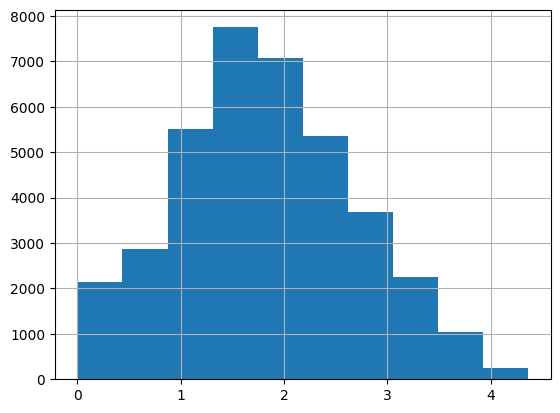

In [23]:
transfomed_X_train[0].hist()
